# CSC8001: Assignment 2
## Part B [50 marks]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

## B1: Fuel efficiency [25 total marks]
For this problem we're going to use the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Auto MPG Data set to explore the association between a car's horsepower and its fuel efficiency.

### B1.1 Load data [5 marks]
For the `b11()` function below: load the Auto MPG data into a Data Frame, clean data as required, and return the Data Frame. 

The `auto-mpg.data` data file and its data description, `auto-mpg.names`, are available in the assignment data folder.  Be sure to read the data description file.  Use the `Attribute` names provided in `auto-mpg.names` for your Data Frame's column names.  For two word attribute names use the 2nd word: `year` for `model year` and `name` for `car name`.

In [6]:
def b11():
    # reading the csv file to pandas and adding the column names
    data =  pd.read_csv('data/auto-mpg.data',delim_whitespace=True, 
                   names = ["mpg","cylinders","displacement","horsepower",
                            "weight","accerlation","year","origin","name"])
    
    # cleaning the data as there is missing value in horsepower column
    horsepower_missing=data[data.horsepower=='?'].index
    #converting the horspower object to float value
    data.loc[horsepower_missing,'horsepower']=float('nan')
    data.horsepower=data.horsepower.apply(pd.to_numeric)
    data.loc[horsepower_missing,'horsepower']=int(data.horsepower.mean())
        
    return data


In [7]:
auto = b11()
auto.shape



(398, 9)

### B1.2 Multi-axes histogram chart [10 marks]
To help us explore the association between a car's horsepower and its fuel efficiency, create a multi-axes histogram chart plotting `horsepower` vs `mpg`. 

The `b12()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame  
- use `seaborn-whitegrid` style, just for this b12 plot  
- create a plot similar to the one shown below

*Hint: Review the PyDSHB notebooks: 04.11 Settings and Stylesheets and 04.08 Multiple Subplots*.

<img src="b12.PNG" width=488 height=375 align=left />

In [8]:
from matplotlib.gridspec import GridSpec
def b12():
    df=b11()
    #using seaborn-whitegrid style
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(8, 10))
    
    grid = plt.GridSpec(4,6)
    
    combine_axis = fig.add_subplot(grid[1:5, 0:5])
    y_axis = fig.add_subplot(grid[0:1, 0:5], xticklabels=[],sharey=combine_axis)
    x_axis = fig.add_subplot(grid[1:4, 5], yticklabels=[], sharex=combine_axis)
    
    # scatter points on the main axes
    combine_axis.scatter(df.horsepower, df.mpg, alpha=0.5,s=48)
    
    # histogram on the attached axes
    x_axis.hist(df.horsepower, 20,  color='blue')
    y_axis.hist(df.mpg, 20,orientation='horizontal', color='blue')
    
    # setting labels on combined axis
    combine_axis.set_ylabel('Miles Per Gallon [mpg]')
    combine_axis.set_xlabel('Horsepower')
    
    x_axis.set_ylabel('mpg')
    y_axis.set_xlabel('horsepower')
    
    plt.show()

  
   


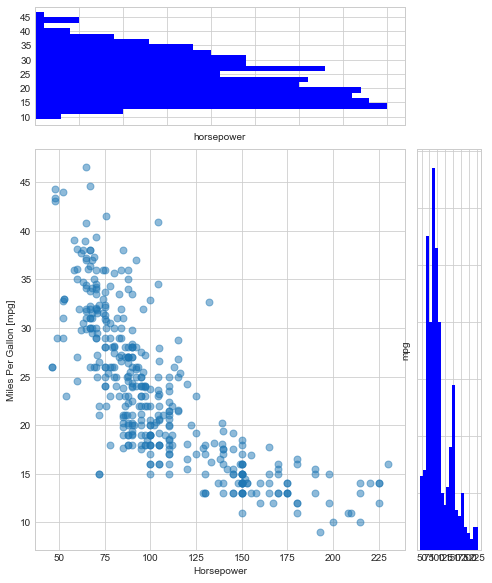

In [9]:
b12()

### B1.3: Two-dimensional histogram [10marks]
Continuing our explorations into the association between a car's horsepower and its fuel effiecincy:

The `b13()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame 
- use Matplotlib's `hist2d()` function to generate a two-dimensional histogram of `mpg` vs `horsepower`.  

Additional plot criteria:
  - Plot `horsepower` on the horizontal axis and `mpg` along the vertical axis.
  - Figure size: 10 by 5
  - 25 bins
  - Plot range values for horsepower between 40 and 235, and mpg between 5 and 50.
   - Colorbar with an appropriate color map
   - Appropriate labels


In [10]:
def b13():
    # Your code/comments here to create two-dimensional histogram  
    df=b11()
    
    #setting the figure size as 10 by 5 using multiple subplots
    fig, ax = plt.subplots(figsize=(10,5))
    
    #setting the horsepower and mpg along the respective axis
    ax.set_title('horsepower vs mpg')
    ax.set_xlabel('Horsepower')
    ax.set_ylabel('Miles Per Gallon of average')
    
    #Setting 2d histogram with appropriate color
    plt.hist2d(x='horsepower', y='mpg', bins=25,data=df, cmap="BuGn")
    
    #setting the plot range value for horsepower between 40 and 235 and mpg between 5 and 50
    plt.xlim(40, 235)
    plt.ylim(5,50)
    
    #setting the colorbar
    plt.colorbar()
    
    #plotting the graph
    plt.show()


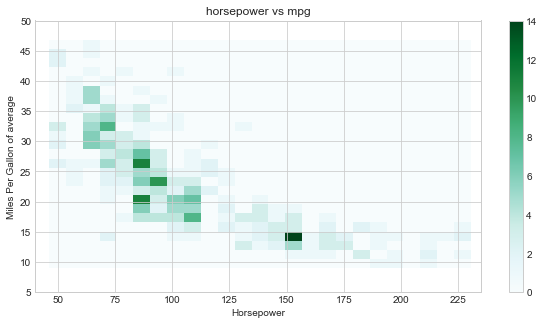

In [11]:
b13()

## B2: Birthdays [25 total marks]
For this problem we will be analysing and visualising U.S. birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the  birth data gathered by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/births) [[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)]: 

There are two birth data files, both available in the assignment `data` folder:

- `US_births_1994-2003_CDC_NCHS.csv`: <br>
   Births from 1994 to 2003 (Centers for Disease Control and   Prevention's National Center for Health Statistics)

- `US_births_2000-2014_SSA.csv`: <br>
   Births from 2000 to 2014 (Social Security Administration)

Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 1994 |	1 |	1 |	6 |	8096 |
 |1994 |	1 |	2 |	7 |	7772 |
 |1994 |	1 |	3 |	1 |	10142 |
 |1994 |	1 |	4 |	2 |	11248 |


### B2.1 Load data [10 marks]
Complete the `b21()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 1994-2014. See `b21().tail()` output below. *Hint: Review the PyDSHB notebook: *03.05 Hierarchical Indexing*.

<img src="b21.PNG" width=221 height=199 align=left />


In [12]:
import pandas as pd
def b21():
    
    #reading the csv files
    df1 = pd.read_csv('data/US_births_1994-2003_CDC_NCHS.csv')
    df2 = pd.read_csv('data/US_births_2000-2014_SSA.csv')
    #concatenating both the files
    df  =pd.concat([df1,df2])
    df_result=df[['month','date_of_month','births']].groupby(['month','date_of_month']).mean()
    return df_result
   

  

In [13]:
b21().tail()

births
month date_of_month          
12    27             11792.48
      28             11758.76
      29             11815.84
      30             11791.08
      31             10462.12

### B2.2 Plot data [15 marks]
Create a heatmap style plot similar to the one shown below from Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/). *HINT: You may find these resources helpful: [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) and PyDSHB: 04.07 Customizing Colorbars*

Additional criteria:
 - Use `b21()` function to load data 
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - Distribution of average daily births per month/day should be similar to article's.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 


<img src="b22.PNG" width=738 height=343 align=left/> <br>

In [16]:
import seaborn as sns
def b22():
    
    figure, axes = plt.subplots()
    
    #get data frame from call b21()
    
    df=b21()
    
    #setting the size of the  figure
    plt.rcParams['figure.figsize'] = (20.0,10.0)
    
    #setting y-axis label
    month=['Jan','Feb', 'March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
    date_of_month=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
    
   
    #pivoting the data frame
    df_total=pd.pivot_table(data=df,index='month', values='births',columns='date_of_month')
    
    #creating the heat map
    sns.heatmap(df_total, cmap='RdPu')
    
    # showing all the ticks
    
    axes.set_xticks(np.arange(len(date_of_month)))
    axes.set_yticks(np.arange(len(month)))
    
    # Rotating the tick labels and setting the alignment
    axes.set_yticklabels(month)
    axes.set_xticklabels(date_of_month)
    
    plt.setp(axes.get_xticklabels(), rotation=100, ha="right",
         rotation_mode="anchor")

   # x-axis at top
    axes.xaxis.set_ticks_position('top')
    plt.show()
    
    
  
  
    

  


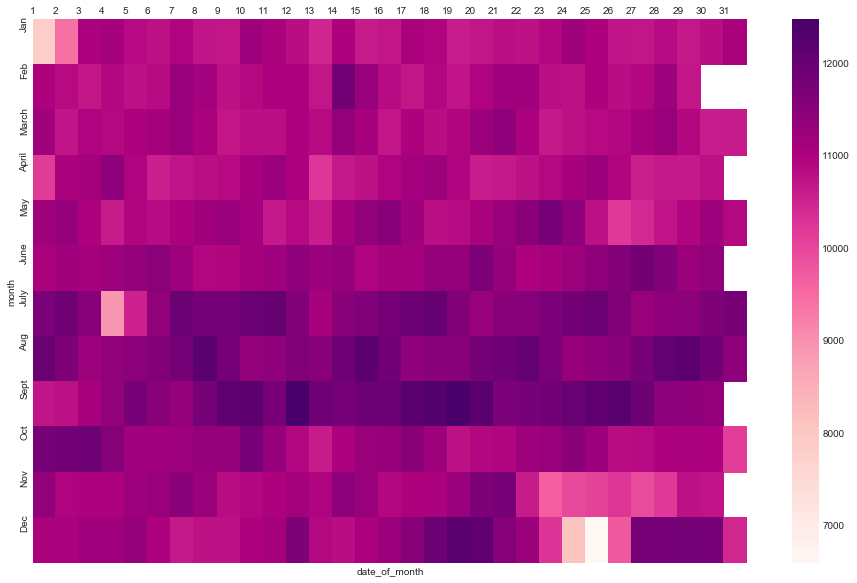

In [17]:
b22()


---------------- **End of Part B** ---------------------


Parts of this assignment were based on/adapted from:
- "Some People Are Too Superstitious To Have A Baby On Friday The 13th", [FiveThirtyEight](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/), 13 May 2016.
- "How Common is Your Birthday", [The Daily Viz](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/), Matt Stiles, September 17, 2016